- Train a SImple Logistic Regression.
- Create a dummy dataset of 2000 samples, 10 features
- Initialize a Weight vector (of same size as of features) and a bias
- Define a training function with forward and backward pass using simple Gradient Descent
- Plot the loss curve after training it for a few epochs.

### Library Import

In [10]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

### Data Preparation

In [ ]:
X, y = make_classification(n_samples=2000, n_features=10, n_classes=2, 
                           n_informative=10, n_redundant=0, random_state=42)

X.shape, y.shape

((10000, 10), (10000,))

### Initialise Weight Vectors

In [5]:
W = np.random.randn(10, )
b = np.random.randn(1)

W, b

(array([-2.9649492 ,  0.53546791,  1.69535803,  0.63368088, -1.10618521,
         1.38669977, -0.59005642,  1.08965406,  2.14853654, -0.69604367]),
 array([-0.48955919]))

### Training ML Model

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(y, y_pred):
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)) # mean of loss over samples, scaler value

In [ ]:
def fit(X, W, b, lr=0.001, epochs=1000):    

    loss_list = []
    for _ in range (epochs):   
        
        # Forward Pass                
        
        Z = X @ W + b # shape (N,)
        y_pred = sigmoid(Z)  # shape (N, )   
        L = log_loss(y, y_pred)
        loss_list.append(L)
        
        # Backward Pass
        
        # Using chain rule of differentiation          
        # dL_by_dW = dL_by_dy_pred * dy_pred_by_dZ * dZ_by_dW
        # dL_by_db = dL_by_dy_pred * dy_pred_by_dZ * dZ_by_db
        
        # dL_by_dy_pred = -y/y_pred + (1-y)/(1-y_pred)
        #               = (y_pred - y)/(y_pred * (1 - y_pred))
        
        # dy_pred_by_dz = (sigmoid(Z)(1 - sigmoid(Z))) 
        #               = (y_pred * (1 - y_pred))
        
        # dL_by_dZ = dL_by_dy_pred * dy_pred_by_dz
        #           = y_pred - y
        
        dL_by_dZ = y_pred - y # shape (N, )        
        
        dL_by_dW = (X.T @ dL_by_dZ) / len(y) # shape(10,)
        dL_by_db = np.mean(dL_by_dZ*1) # scaler  
        
        W -= lr*dL_by_dW
        b -= lr*dL_by_db           
        
    return loss_list

In [ ]:
epochs = 1000
sgd_loss = fit(X, W.copy(), b.copy(), epochs=epochs)

### Plot the loss

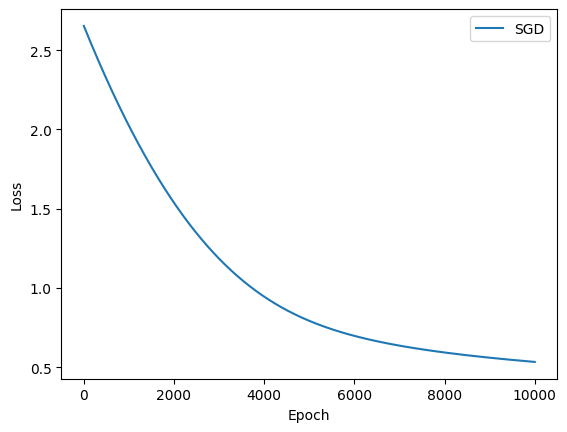

In [ ]:
plt.plot(np.linspace(1, epochs, epochs), sgd_loss, label="SGD")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()